# Sheridan Kamal

## DATA 73500 - Assignment 7

### Purpose
In this notebook, we will be scraping data from the clapbecausewecare hashtag on twitter and visualizing how many times the tweets were favorited with the hashtag and what language the tweets were written in. I chose this hashtag because of all of the health care workers who are working hard during this pandemic and wanted to see how they were mentioned on twitter.

### Data
The data is scraped from twitter using the twitter api and from the clapbecausewecare hashtag.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import twitter as tw
import json
import math
import collections as cl
import matplotlib.pyplot as plt
import twitter as tw

In [2]:
CONSUMER_KEY = 'GDzHFRHpXG8GmazEa686SWrW8'
CONSUMER_SECRET = 'ugtGSyqQZWLxehCCJu7fBQxPquWai1grAaPVANeOC0EMZSUvF1'
OAUTH_TOKEN = '62099456-hWeDi3BLYTm6is402uqrMYUcdhZJD2DmVpUfDdiAw'
OAUTH_TOKEN_SECRET = 'nvys4S2sORvS13iWbQhW2QRZ5KXaJze5u8T5UlJVhdJkT'

auth = tw.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = tw.Twitter(auth=auth)

In [3]:
htag = '%23clapbecausewecare'
n = 25000
hcw = twitter_api.search.tweets(q=htag, count=n)
hcw_statuses = hcw['statuses']
hcw_df = pd.read_json(json.dumps(hcw_statuses))
hcw_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2020-05-18 21:07:36+00:00,1262490042175553536,1262490042175553536,RT @LearyFF: The words 'thank you' have never ...,False,"{'hashtags': [{'text': 'ClapBecauseWeCare', 'i...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,12,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,2020-05-18 21:06:44+00:00,1262489823027159040,1262489823027159040,RT @LearyFF: The words 'thank you' have never ...,False,"{'hashtags': [{'text': 'ClapBecauseWeCare', 'i...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,12,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,2020-05-18 20:27:29+00:00,1262479946934620168,1262479946934620160,RT @WFP_Zimbabwe: From all of us at @WFP_Zimba...,False,"{'hashtags': [{'text': 'frontline', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,6,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,2020-05-18 20:14:00+00:00,1262476553478422539,1262476553478422528,RT @MusgroveWillows: Pic from last Wednesday w...,False,"{'hashtags': [{'text': 'SomersetFT', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,2020-05-18 19:44:50+00:00,1262469211160526857,1262469211160526848,RT @LearyFF: The words 'thank you' have never ...,False,"{'hashtags': [{'text': 'ClapBecauseWeCare', 'i...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,12,0,False,False,en,NaN,NaN,NaN,NaN,NaN


In [4]:
hcw_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

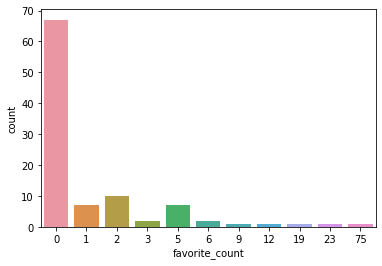

In [5]:
sb.countplot(x='favorite_count', data=hcw_df)

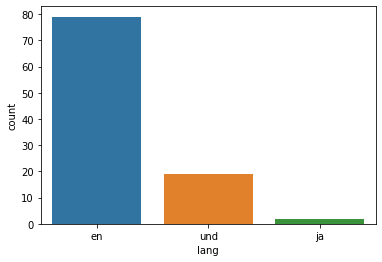

In [6]:
sb.countplot(x='lang', data=hcw_df)